In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [5]:
(x_train,_), (x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

x_train=x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
input_dim=x_train.shape[1]
encoding_dim=32
input_img=Input(shape=(input_dim,))
encoded=Dense(encoding_dim,activation='relu')(input_img)
decoded=Dense(input_dim, activation='sigmoid')(encoded)
autoencoder=Model(input_img,decoded)
encoder=Model(input_img,encoded)

autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train, epochs=2, batch_size=256, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/2
235/235 [==============================] - 2s 6ms/step - loss: 0.2740 - val_loss: 0.1862
Epoch 2/2
235/235 [==============================] - 1s 6ms/step - loss: 0.1683 - val_loss: 0.1525


In [9]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=autoencoder.predict(x_test)

313/313 [==============================] - 0s 941us/step


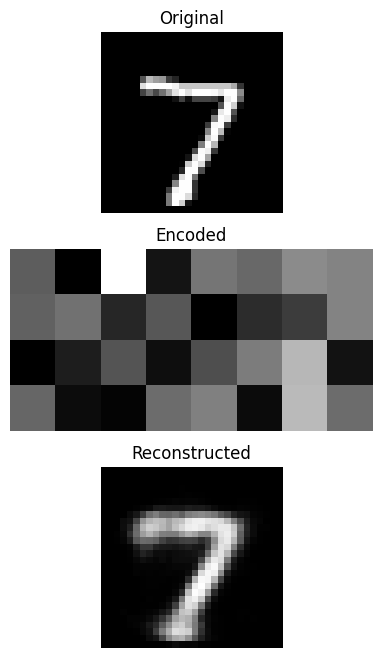

In [11]:
n=1
plt.figure(figsize=(18,8))
for i in range(n):
    ax=plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Original")
    plt.gray()
    ax.axis('off')
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8)) # Reshape for visualization
    plt.title("Encoded")
    plt.gray()
    ax.axis('off')
    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.axis('off')
    plt.show()